In [2]:
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
%matplotlib inline

In [3]:
sns.set_theme()

In [4]:
glob('market/*.csv')

['market/department.csv',
 'market/order_products_train.csv',
 'market/sample__submission.csv',
 'market/aisle.csv',
 'market/order.csv',
 'market/product.csv',
 'market/order_products_prior.csv']

# 데이터셋 로드

In [5]:
# 훈련으로 사용할 데이터셋
order_products_train = pd.read_csv('market/order_products_train.csv')
print(order_products_train.shape)
order_products_train.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [6]:
order_products_train.sort_values(by=['order_id', 'add_to_cart_order']).head(20)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


In [7]:
# 이전 주문 정보를 포함
order_products_prior = pd.read_csv('market/order_products_prior.csv')
print(order_products_prior.shape)
order_products_prior.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [8]:
order_products_prior.sort_values(by=['order_id', 'add_to_cart_order']).head(20)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [9]:
# 모든 주문 정보를 포함
order = pd.read_csv('market/order.csv')
print(order.shape)
order.head()

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [10]:
# 상품 정보
product = pd.read_csv('market/product.csv')
print(product.shape)
product.head()

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [11]:
# 상품 부서 정보
department = pd.read_csv('market/department.csv')
print(department.shape)
department.head()

(21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [12]:
# 상품 카테고리
aisle = pd.read_csv('market/aisle.csv')
print(aisle.shape)
aisle.head()

(134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [13]:
submission = pd.read_csv('market/sample__submission.csv')
print(submission.shape)
submission.head()

(75000, 2)


,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259


In [14]:
submission.sort_values(by='order_id').head(10)

,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259
5,313,39276 29259
6,353,39276 29259
7,386,39276 29259
8,414,39276 29259
9,418,39276 29259


# 데이터셋 정보 확인

In [15]:
order.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order'],
      dtype='object')

In [16]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [17]:
order.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [18]:
order[order.days_since_prior_order.isnull()]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
11,2168274,2,prior,1,2,11,NaN
26,1374495,3,prior,1,1,14,NaN
39,3343014,4,prior,1,6,11,NaN
45,2717275,5,prior,1,3,12,NaN
...,...,...,...,...,...,...,...
3420930,969311,206205,prior,1,4,12,NaN
3420934,3189322,206206,prior,1,3,18,NaN
3421002,2166133,206207,prior,1,6,19,NaN
3421019,2227043,206208,prior,1,1,15,NaN


In [19]:
order[order.days_since_prior_order.isnull()]['order_number'].unique()

array([1])

In [20]:
order[order.days_since_prior_order.isnull()]['eval_set'].unique()

array(['prior'], dtype=object)

In [21]:
order["eval_set"].unique()

array(['prior', 'train', 'test'], dtype=object)

In [22]:
test = order[order["eval_set"] == 'test']
print("test의 shape 값>>", test.shape)
print("submission의 shape 값>>", submission.shape)
test.head(3)

test의 shape 값>> (75000, 7)
submission의 shape 값>> (75000, 2)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
38,2774568,3,test,13,5,15,11.0
44,329954,4,test,6,3,12,30.0
53,1528013,6,test,4,3,16,22.0


In [23]:
prior = order[order["eval_set"] == 'prior']
print("prior 의 shape 값>>", prior.shape)
print("order_products_prior 의 shape 값>>", order_products_prior.shape)
prior.head(3)

prior 의 shape 값>> (3214874, 7)
order_products_prior 의 shape 값>> (32434489, 4)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0


In [24]:
train = order[order["eval_set"] == 'train']
print("train 의 shape 값>>", train.shape)
print("order_products_train 의 shape 값>>", order_products_train.shape)
train.head(3)

train 의 shape 값>> (131209, 7)
order_products_train 의 shape 값>> (1384617, 4)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
10,1187899,1,train,11,4,8,14.0
25,1492625,2,train,15,1,11,30.0
49,2196797,5,train,5,0,11,6.0


In [25]:
order.groupby(['user_id'])[['order_id', 'order_number']].count().describe()

,order_id,order_number
count,206209.000000,206209.000000
mean,16.590367,16.590367
std,16.654774,16.654774
min,4.000000,4.000000
25%,6.000000,6.000000
50%,10.000000,10.000000
75%,20.000000,20.000000
max,100.000000,100.000000


In [26]:
order[order['user_id'].duplicated()]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


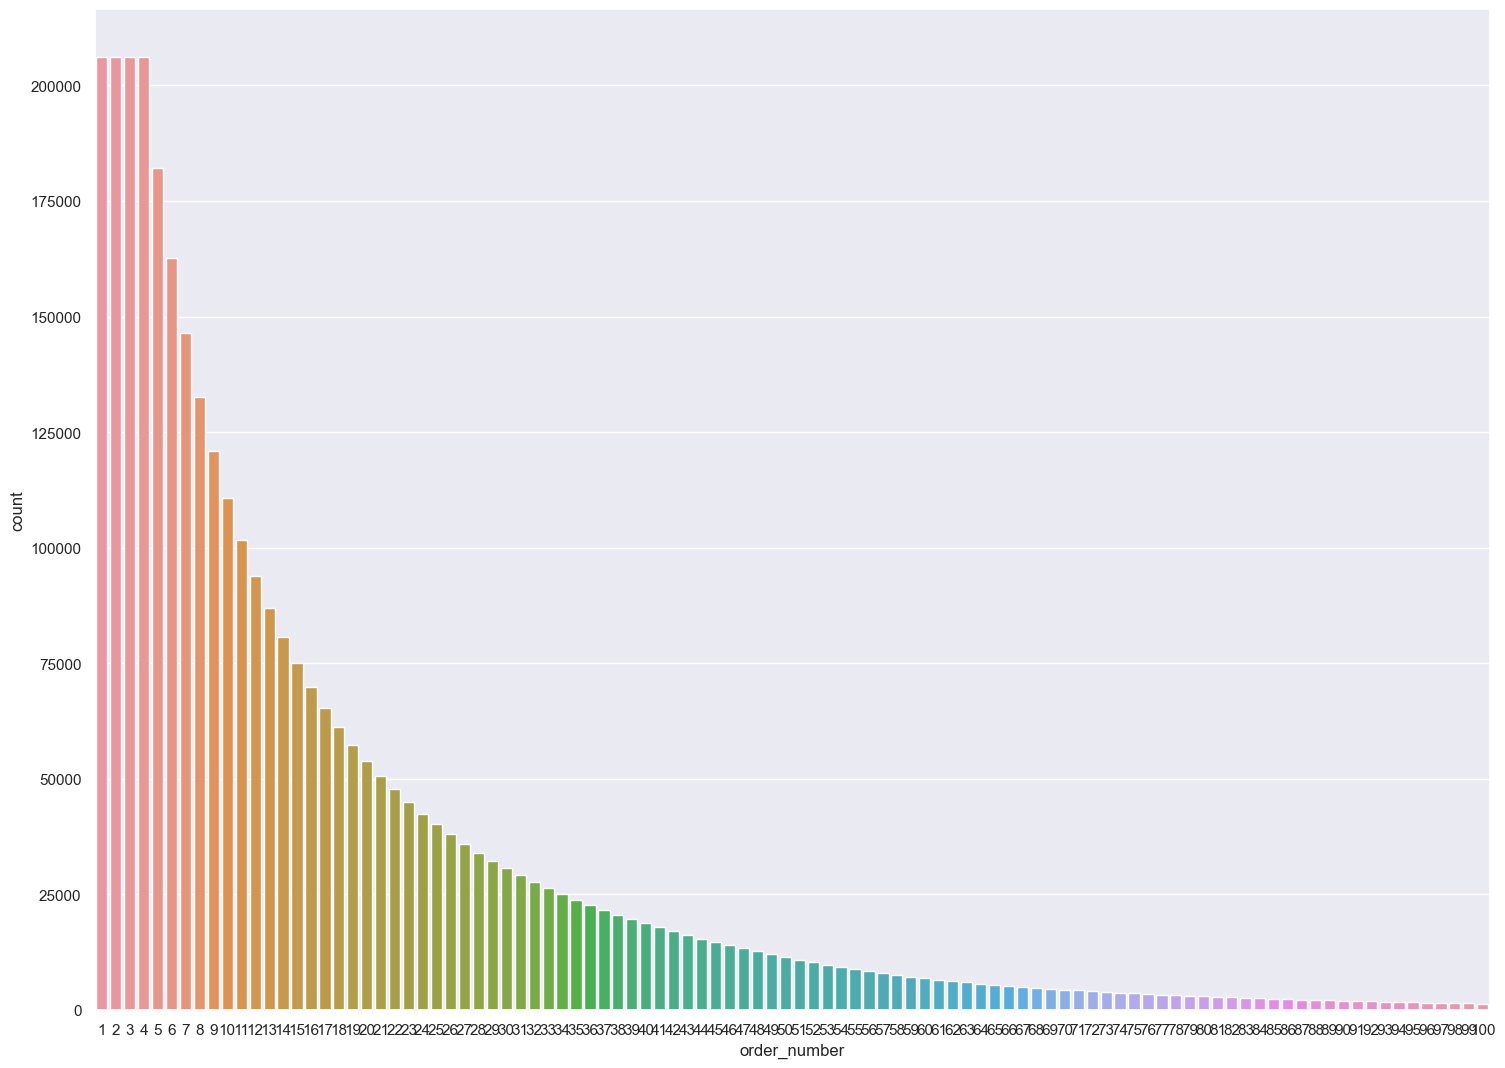

In [27]:
plt.figure(figsize=(18, 13))
sns.countplot(data=order, x='order_number');

In [28]:
order.query('order_number >= 100')

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3264,3176785,210,train,100,1,12,5.0
5122,988,310,train,100,2,9,4.0
5243,2956359,313,train,100,1,6,4.0
11182,3327840,690,train,100,4,11,2.0
12588,90628,786,train,100,0,10,2.0
...,...,...,...,...,...,...,...
3408960,1664187,205483,train,100,2,9,3.0
3410122,2720227,205543,train,100,2,18,8.0
3415733,105274,205878,train,100,1,13,7.0
3417312,68079,205972,train,100,5,10,0.0


In [29]:
order.query('user_id == 210')

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3165,3264342,210,prior,1,0,12,NaN
3166,2420729,210,prior,2,3,7,3.0
3167,2844082,210,prior,3,6,11,3.0
3168,1751757,210,prior,4,0,13,1.0
3169,2531142,210,prior,5,3,7,3.0
...,...,...,...,...,...,...,...
3260,863347,210,prior,96,6,10,2.0
3261,3207289,210,prior,97,3,16,4.0
3262,1607543,210,prior,98,0,7,4.0
3263,2306299,210,prior,99,3,18,3.0


In [30]:
order.query('order_id == 2')

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3355525,2,202279,prior,3,5,9,8.0


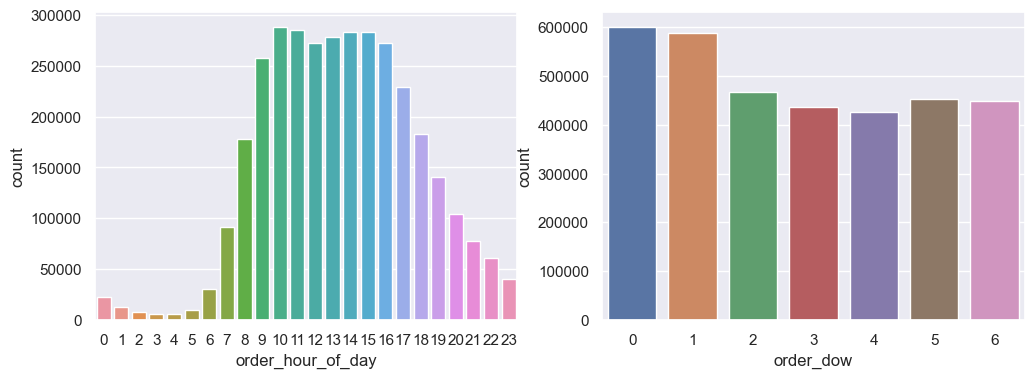

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(data=order, x='order_hour_of_day', ax=axs[0])
sns.countplot(data=order, x='order_dow', ax=axs[1])
plt.show()


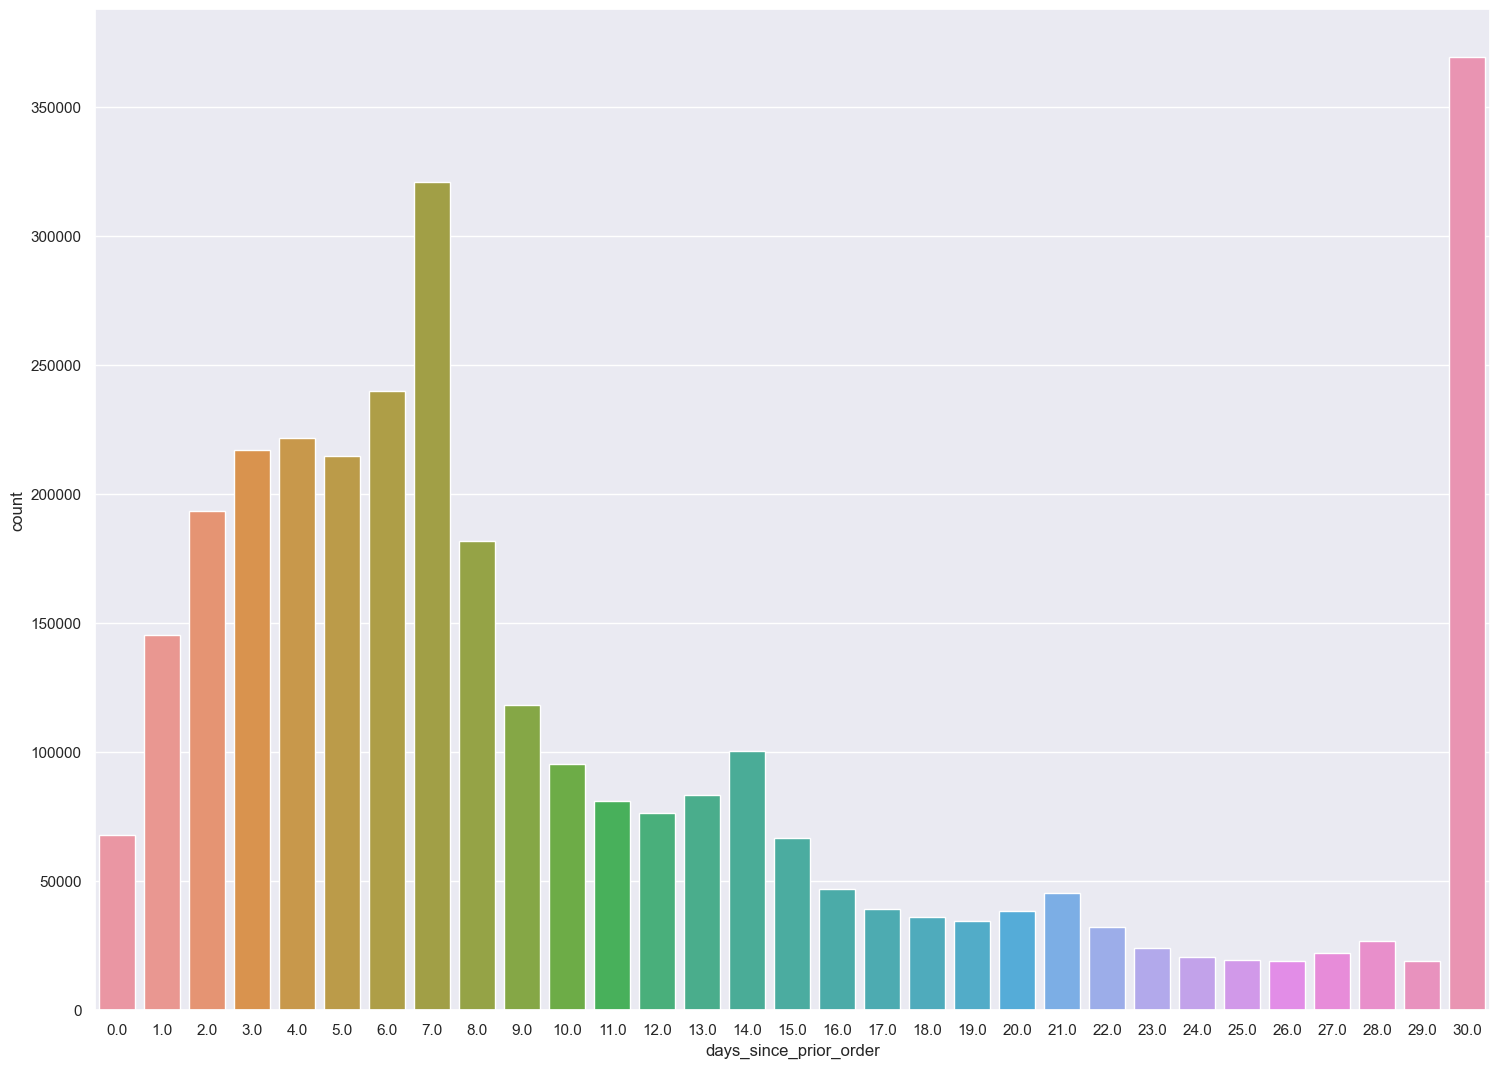

In [61]:
plt.figure(figsize=(18, 13))
sns.countplot(data=order, x='days_since_prior_order');

In [33]:
order_products = pd.concat([order_products_train, order_products_prior])
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [34]:
df_tem = order_products.join(product.set_index('product_id'), on='product_id', how='left')
df_tem2 = df_tem.join(order.set_index('order_id'), on='order_id', how='left')
df_tem3 = df_tem2.join(department.set_index('department_id'), on='department_id', how='left')
df_all = df_tem3.join(aisle.set_index('aisle_id'), on='aisle_id', how='left')


In [35]:
print('주문내역 모든 정보 >>', df_all.shape)
df_all.head()

주문내역 모든 정보 >> (33819106, 15)


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department,aisle
0,1,49302,1,1,Bulgarian Yogurt,120,16,112108,train,4,4,10,9.0,dairy eggs,yogurt
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,112108,train,4,4,10,9.0,dairy eggs,other creams cheeses
2,1,10246,3,0,Organic Celery Hearts,83,4,112108,train,4,4,10,9.0,produce,fresh vegetables
3,1,49683,4,0,Cucumber Kirby,83,4,112108,train,4,4,10,9.0,produce,fresh vegetables
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,112108,train,4,4,10,9.0,canned goods,canned meat seafood


In [37]:
df_all[df_all.duplicated()]

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department,aisle


In [38]:
df_all['order_id'].nunique()

3346083

In [39]:
order.loc[(order.eval_set == 'train') |
          (order.eval_set == 'prior'), ].shape

(3346083, 7)

In [41]:
df_all.product_name.nunique()

49685

In [42]:
product.shape

(49688, 4)

In [43]:
item = product.join(order_products.set_index('product_id'), on='product_id', how='left')

In [45]:
# 주문된 적이 없는 제품 3개
item[item['order_id'].isnull()]

,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered
3629,3630,Protein Granola Apple Crisp,57,14,NaN,NaN,NaN
7044,7045,Unpeeled Apricot Halves in Heavy Syrup,88,13,NaN,NaN,NaN
46624,46625,Single Barrel Kentucky Straight Bourbon Whiskey,31,7,NaN,NaN,NaN


In [46]:
df_all['reordered'].value_counts()

1    19955360
0    13863746
Name: reordered, dtype: int64

In [47]:
df_all['reordered'].value_counts(1)

1    0.590062
0    0.409938
Name: reordered, dtype: float64

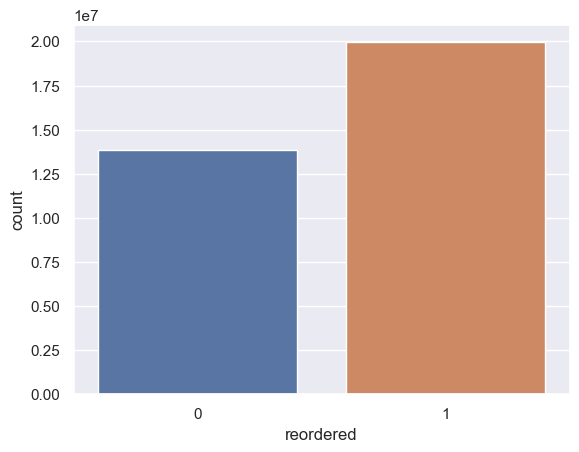

In [48]:
sns.countplot(data=df_all, x='reordered');

In [49]:
add_first = df_all.loc[df_all['add_to_cart_order'] == 1, 
                       ['product_id', 'product_name', 'reordered']]

In [50]:
add_first.head(3)

,product_id,product_name,reordered
0,49302,Bulgarian Yogurt,1
8,39612,Grated Pecorino Romano Cheese,0
16,11913,Shelled Pistachios,0


In [51]:
add_first['reordered'].value_counts()

1    2273000
0    1073083
Name: reordered, dtype: int64

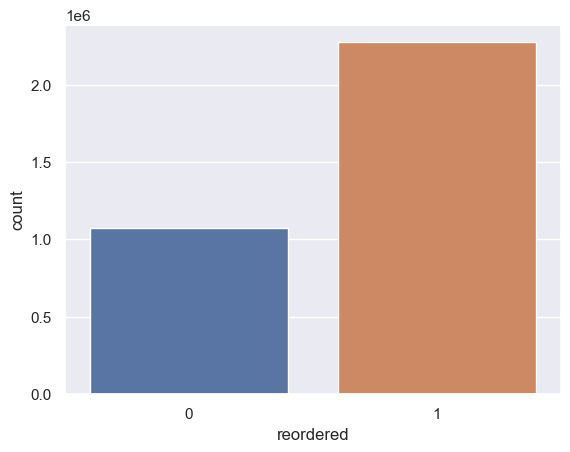

In [52]:
sns.countplot(data=add_first, x='reordered');

In [59]:
hod = df_all['order_hour_of_day'].value_counts().sort_index()
df_hod = pd.DataFrame(hod)
df_hod.style.background_gradient()

,order_hour_of_day
0,228031
1,121412
2,72660
3,53759
4,55714
5,91909
6,302642
7,928239
8,1787359
9,2550569


In [60]:
dow = df_all['order_dow'].value_counts().sort_index()
df_dow = pd.DataFrame(dow)
df_dow.style.background_gradient()

,order_dow
0,6533692
1,5871834
2,4378360
3,3998498
4,3942696
5,4386443
6,4707583


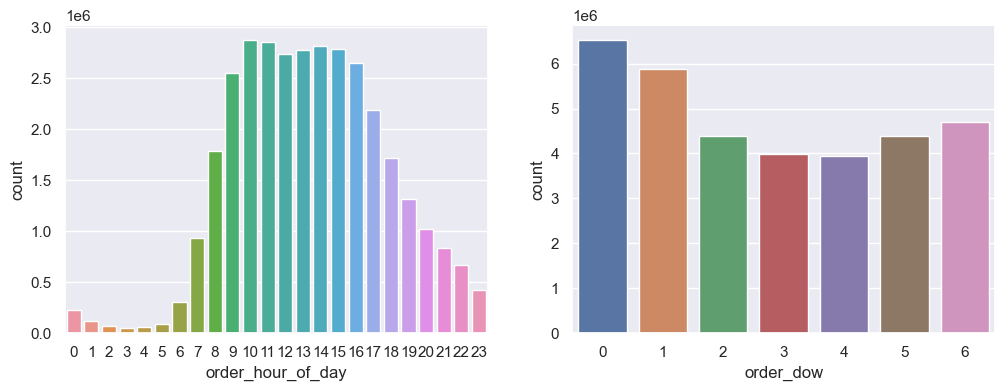

In [53]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(data=df_all, x='order_hour_of_day', ax=axs[0])
sns.countplot(data=df_all, x='order_dow', ax=axs[1])
plt.show()

In [63]:
dpo = df_all['days_since_prior_order'].value_counts().sort_index()
df_dpo = pd.DataFrame(dpo)
df_dpo.style.background_gradient()

,days_since_prior_order
0.000000,465742
1.000000,960381
2.000000,1492379
3.000000,1914431
4.000000,2126287
5.000000,2180537
6.000000,2592077
7.000000,3586305
8.000000,1995636
9.000000,1262383


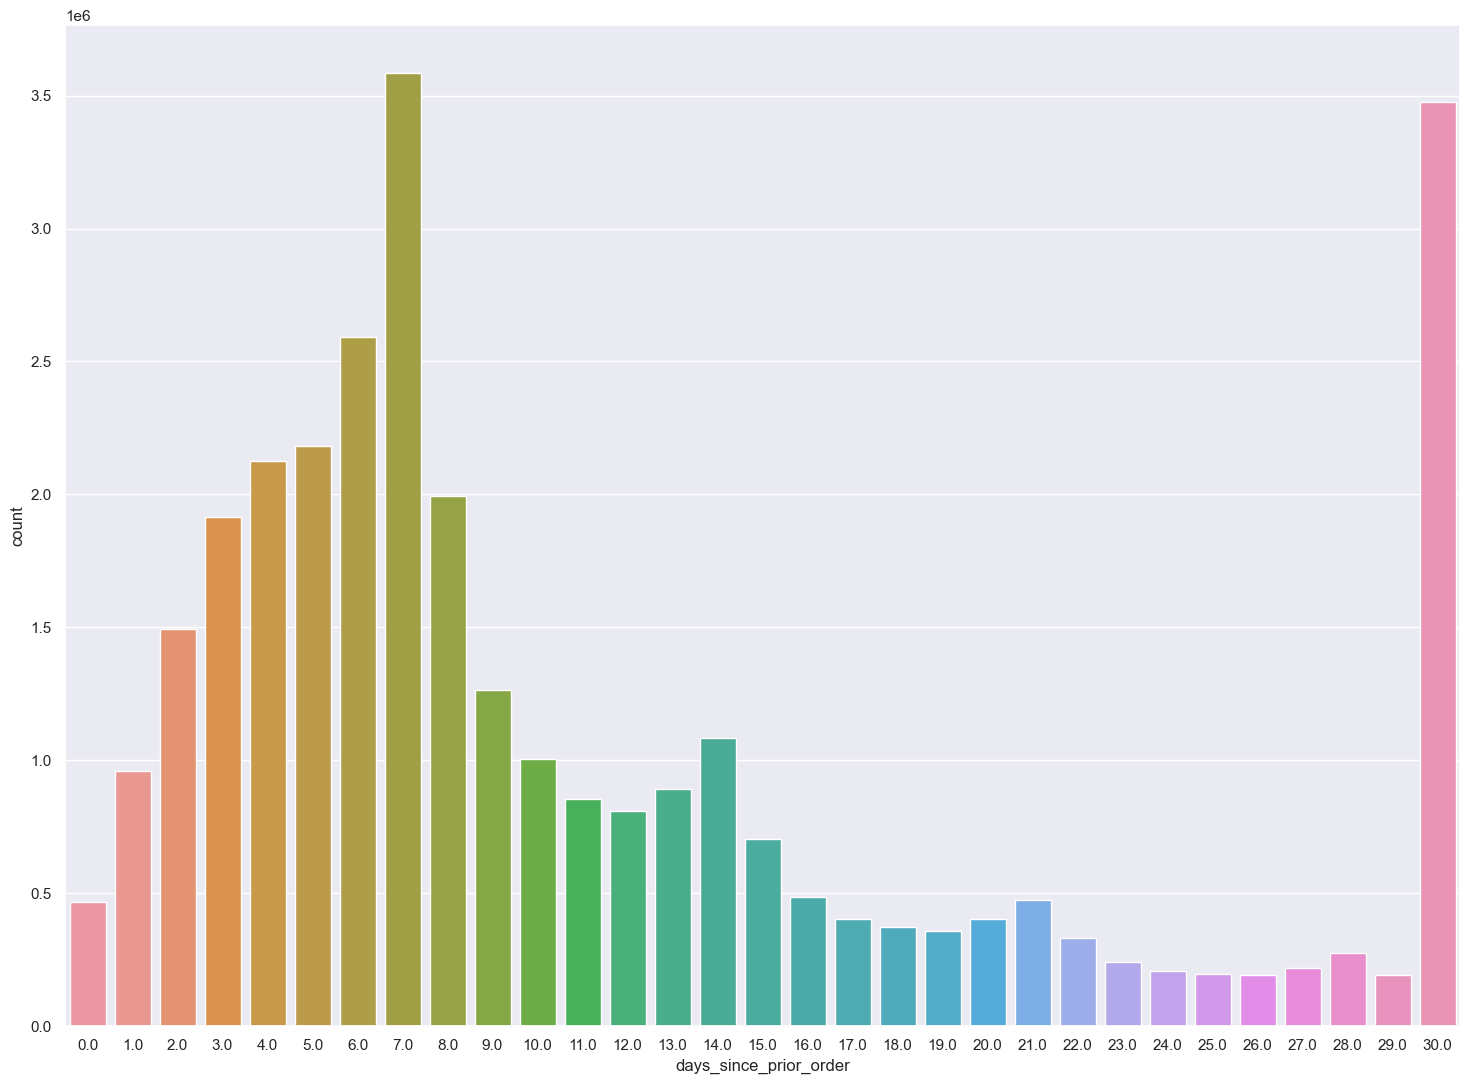

In [62]:
plt.figure(figsize=(18, 13))
sns.countplot(data=df_all, x='days_since_prior_order');

In [66]:
# 7일만에 주문하는 품목 top10은?
df_seven = df_all.query('days_since_prior_order == 7')[
    ['product_name', 'reordered', 'order_dow', 'order_hour_of_day']]

In [73]:
top_seven = df_seven['product_name'].value_counts().sort_values(ascending=False).head(10)
pd.DataFrame(top_seven).style.background_gradient()

,product_name
Banana,59420
Bag of Organic Bananas,44119
Organic Strawberries,29586
Organic Baby Spinach,27177
Organic Hass Avocado,23841
Organic Avocado,20513
Large Lemon,17851
Strawberries,16851
Organic Whole Milk,15885
Limes,15765


In [69]:
# 30일만에 주문하는 품목 top10은?
df_thirty = df_all.query('days_since_prior_order == 30')[
    ['product_name', 'reordered', 'order_dow', 'order_hour_of_day']]

In [72]:
top_thirty = df_thirty['product_name'].value_counts().sort_values(ascending=False).head(10)
pd.DataFrame(top_thirty).style.background_gradient()

,product_name
Banana,46009
Bag of Organic Bananas,32095
Organic Baby Spinach,25358
Organic Strawberries,22202
Large Lemon,18674
Organic Hass Avocado,18398
Organic Avocado,18014
Strawberries,15572
Limes,15293
Cucumber Kirby,11939


In [75]:
df_all.loc[(df_all['days_since_prior_order'] == 7) |
           (df_all['days_since_prior_order'] == 30), ['days_since_prior_order', 'product_name']
            ].groupby(['product_name', 'days_since_prior_order']).count()

Empty DataFrame
Columns: []
Index: [(#2 Coffee Filters, 7.0), (#2 Coffee Filters, 30.0), (#2 Cone White Coffee Filters, 7.0), (#2 Cone White Coffee Filters, 30.0), (#2 Mechanical Pencils, 7.0), (#2 Mechanical Pencils, 30.0), (#4 Natural Brown Coffee Filters, 7.0), (#4 Natural Brown Coffee Filters, 30.0), (& Go! Hazelnut Spread + Pretzel Sticks, 7.0), (& Go! Hazelnut Spread + Pretzel Sticks, 30.0), ('Swingtop' Premium Lager, 30.0), ((70% Juice!) Mountain Raspberry Juice Squeeze, 7.0), ((70% Juice!) Mountain Raspberry Juice Squeeze, 30.0), (+Energy Black Cherry Vegetable & Fruit Juice, 7.0), (+Energy Black Cherry Vegetable & Fruit Juice, 30.0), (.5\" Waterproof Tape, 30.0), (0 Calorie Acai Raspberry Water Beverage, 7.0), (0 Calorie Acai Raspberry Water Beverage, 30.0), (0 Calorie Fuji Apple Pear Water Beverage, 7.0), (0 Calorie Fuji Apple Pear Water Beverage, 30.0), (0 Calorie Strawberry Dragonfruit Water Beverage, 7.0), (0 Calorie Strawberry Dragonfruit Water Beverage, 30.0), (0% Fat Black Cherry Greek Yogurt y, 7.0), (0% Fat Black Cherry Greek Yogurt y, 30.0), (0% Fat Blueberry Greek Yogurt, 7.0), (0% Fat Blueberry Greek Yogurt, 30.0), (0% Fat Free Organic Milk, 7.0), (0% Fat Free Organic Milk, 30.0), (0% Fat Greek Yogurt Black Cherry on the Bottom, 7.0), (0% Fat Greek Yogurt Black Cherry on the Bottom, 30.0), (0% Fat Greek Yogurt Vanilla, 7.0), (0% Fat Greek Yogurt Vanilla, 30.0), (0% Fat Organic Greek Vanilla Yogurt, 7.0), (0% Fat Organic Greek Vanilla Yogurt, 30.0), (0% Fat Peach Greek Yogurt, 7.0), (0% Fat Peach Greek Yogurt, 30.0), (0% Fat Strawberry Greek Yogurt, 7.0), (0% Fat Strawberry Greek Yogurt, 30.0), (0% Fat Superfruits Greek Yogurt, 7.0), (0% Fat Superfruits Greek Yogurt, 30.0), (0% Fat Vanilla Greek Yogurt, 7.0), (0% Fat Vanilla Greek Yogurt, 30.0), (0% Greek Strained Yogurt, 7.0), (0% Greek Strained Yogurt, 30.0), (0% Greek Yogurt Black Cherry on the Bottom, 7.0), (0% Greek Yogurt Black Cherry on the Bottom, 30.0), (0% Greek, Blueberry on the Bottom Yogurt, 7.0), (0% Greek, Blueberry on the Bottom Yogurt, 30.0), (0% Milkfat Greek Plain Yogurt, 7.0), (0% Milkfat Greek Plain Yogurt, 30.0), (0% Milkfat Greek Yogurt Honey, 7.0), (0% Milkfat Greek Yogurt Honey, 30.0), (1 % Lowfat Milk, 7.0), (1 % Lowfat Milk, 30.0), (1 Apple + 1 Mango Fruit Bar, 7.0), (1 Apple + 1 Mango Fruit Bar, 30.0), (1 Apple + 1 Pear Fruit Bar, 7.0), (1 Apple + 1 Pear Fruit Bar, 30.0), (1 Cup Measuring Cup, 30.0), (1 Liter, 7.0), (1 Liter, 30.0), (1 Mg Melatonin Sublingual Orange Tablets, 7.0), (1 Mg Melatonin Sublingual Orange Tablets, 30.0), (1 Ply Napkins, 7.0), (1 Ply Napkins, 30.0), (1 Ply Paper Towels, 7.0), (1 Ply Paper Towels, 30.0), (1 Ply White Luncheon Napkins, 7.0), (1 Ply White Luncheon Napkins, 30.0), (1 Razor Handle and 2 Freesia Scented Razor Refills  Premium BladeRazor System, 7.0), (1 Razor Handle and 2 Freesia Scented Razor Refills  Premium BladeRazor System, 30.0), (1 Step Kashmir Spinach Indian Cuisine, 7.0), (1 Step Kashmir Spinach Indian Cuisine, 30.0), (1 Step-1 Minute Noodles Toasted Sesame, 7.0), (1 Step-1 Minute Noodles Toasted Sesame, 30.0), (1 to 1 Gluten Free Baking Flour, 7.0), (1 to 1 Gluten Free Baking Flour, 30.0), (1% Chocolate Milk, 7.0), (1% Chocolate Milk, 30.0), (1% Hydrocortisone Anti-Itch Cream, Tube Anti-Itch, 7.0), (1% Hydrocortisone Anti-Itch Cream, Tube Anti-Itch, 30.0), (1% Hydrocortisone Anti-Itch Liquid Maximum Strength with Healing Aloe, 30.0), (1% Low Fat Chocolate Milk, 7.0), (1% Low Fat Chocolate Milk, 30.0), (1% Low Fat Cottage Cheese, 7.0), (1% Low Fat Cottage Cheese, 30.0), (1% Low Fat Milk, 7.0), (1% Low Fat Milk, 30.0), (1% Lowfat Chocolate Milk, 7.0), (1% Lowfat Chocolate Milk, 30.0), (1% Lowfat Cottage Cheese, 7.0), (1% Lowfat Cottage Cheese, 30.0), (1% Lowfat Cultured Buttermilk, 7.0), (1% Lowfat Cultured Buttermilk, 30.0), (1% Lowfat Milk, 7.0), (1% Lowfat Milk, 30.0), (1% Lowfat Organic Milk, 7.0), (1% Lowfat Organic Milk, 30.0), (1% Lowfat Vanilla Milk, 7.0), (1% Lowfat Vanilla Mil